In [1]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import urllib

In [2]:
def fetch(url):
    response = requests.get(url)
    response = requests.get(url, cookies={'over18': '1'})  # 一直向 server 回答滿 18 歲了 !
    return response

In [3]:
url = 'https://www.ptt.cc/bbs/Beauty/index.html'

In [4]:
addr = []
for round in range(1):
    res = fetch(url)#抓取網站中的原始碼
    soup = BeautifulSoup(res.text,'html.parser')
    articles = soup.select('div.title a')#從<div>中抓取標題的連結
    paging = soup.select('div.btn-group-paging a')#找到上一頁(next_url)在哪
    next_url = 'https://www.ptt.cc' + paging[1]['href']#真正的上一頁的網址
    url = next_url
    print("round ",round)
    for article in articles:
        if '[正妹]' in article.text:#只抓正妹的
            addr.append('https://www.ptt.cc'+article['href'])
            #print(article['href'],article.text)
print('已抓取文章網址')

round  0
已抓取文章網址


In [5]:
addr_img = []#抓取圖片網址
for i in addr:
    url = i
    res = fetch(url)
    soup = BeautifulSoup(res.text,"lxml")
    for img in soup.select('div a'):
        if 'jpg' in img['href']:#抓取含有jpg的字串
            addr_img.append(img['href'])
            #print(img['href'])
print('已抓取圖片網址')

已抓取圖片網址


In [6]:
name = 1

for url_img in addr_img:#下載圖片至本地
    urllib.request.urlretrieve(url_img,'D:/Anaconda3/mycode/PTT_photo/'+np.str(name)+'.jpg')
    print('已完成:',name,'張\n')
    name = name +1 

print("圖片已下載完成")

已完成: 1 張

已完成: 2 張

已完成: 3 張

已完成: 4 張

已完成: 5 張

已完成: 6 張

已完成: 7 張

已完成: 8 張

已完成: 9 張

已完成: 10 張

已完成: 11 張

已完成: 12 張

已完成: 13 張

已完成: 14 張

已完成: 15 張

已完成: 16 張

已完成: 17 張

已完成: 18 張

已完成: 19 張

已完成: 20 張

已完成: 21 張

已完成: 22 張

已完成: 23 張

已完成: 24 張

已完成: 25 張

已完成: 26 張

已完成: 27 張

已完成: 28 張

已完成: 29 張

已完成: 30 張

已完成: 31 張

已完成: 32 張

已完成: 33 張

已完成: 34 張

已完成: 35 張

已完成: 36 張

已完成: 37 張

已完成: 38 張

已完成: 39 張

已完成: 40 張

已完成: 41 張

已完成: 42 張

已完成: 43 張

已完成: 44 張

已完成: 45 張

已完成: 46 張

已完成: 47 張

已完成: 48 張

已完成: 49 張

已完成: 50 張

已完成: 51 張

已完成: 52 張

已完成: 53 張

已完成: 54 張

已完成: 55 張

已完成: 56 張

已完成: 57 張

已完成: 58 張

已完成: 59 張

已完成: 60 張

已完成: 61 張

已完成: 62 張

已完成: 63 張

已完成: 64 張

已完成: 65 張

已完成: 66 張

已完成: 67 張

已完成: 68 張

已完成: 69 張

已完成: 70 張

已完成: 71 張

已完成: 72 張

已完成: 73 張

已完成: 74 張

已完成: 75 張

已完成: 76 張

已完成: 77 張

圖片已下載完成


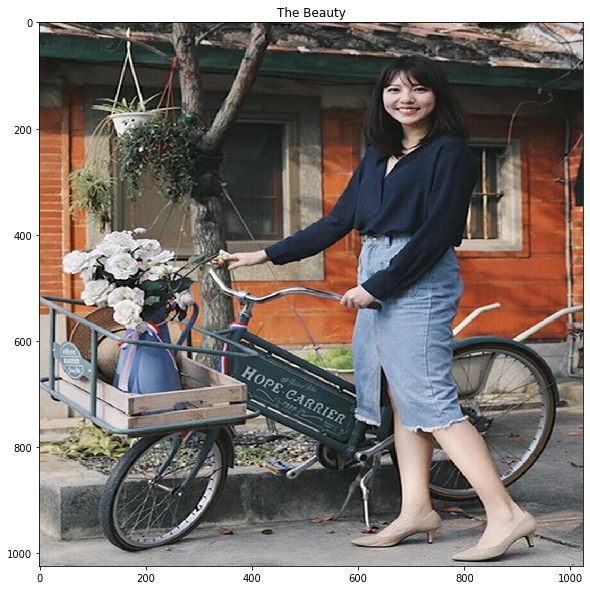

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(r'D:/Anaconda3/mycode/PTT_photo/1.jpg')
img1 = img.resize((1024, 1024),Image.ANTIALIAS)
plt.figure(figsize=(10,10))
plt.title('The Beauty')
plt.imshow(img1)